In [1]:
import pandas as pd
from pathlib import Path

BASE_DIR = Path.cwd().parent
DATA_PATH = BASE_DIR / "data" / "processed" / "creditcard.parquet"

df = pd.read_parquet(DATA_PATH)

df.shape


(284807, 31)

In [2]:
df["Class"].value_counts(normalize=True)


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [3]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


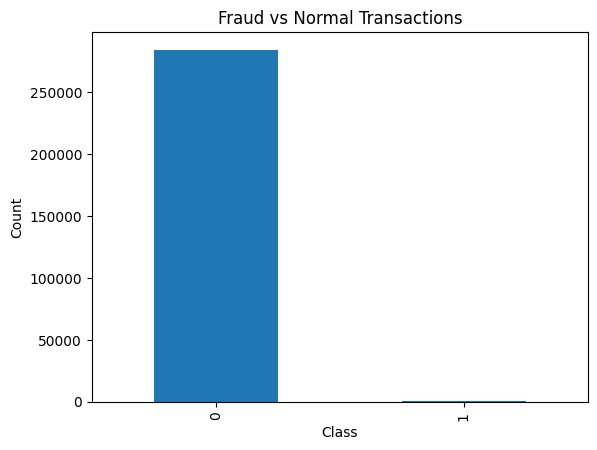

: 

In [ ]:
import matplotlib.pyplot as plt

df["Class"].value_counts().plot(kind="bar")

plt.title("Fraud vs Normal Transactions")
plt.xlabel("Class")
plt.ylabel("Count")

plt.show()


In [3]:
import pandas as pd
from pathlib import Path

BASE_DIR = Path.cwd().parent
DATA_PATH = BASE_DIR / "data" / "processed" / "creditcard.parquet"

df = pd.read_parquet(DATA_PATH)

df.shape


(284807, 31)

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)


(227845, 30) (56962, 30)


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)


(227845, 30) (56962, 30)


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

print("Model trained with scaled data")


Model trained with scaled data


In [9]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score

y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)

auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("AUC:", auc)
print("Precision:", precision)
print("Recall:", recall)


AUC: 0.9605494455801453
Precision: 0.8266666666666667
Recall: 0.6326530612244898


In [10]:
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.05)

for t in thresholds:
    y_pred = (y_pred_proba > t).astype(int)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f"Threshold {t:.2f}  Precision {precision:.3f}  Recall {recall:.3f}")


Threshold 0.10  Precision 0.701  Recall 0.765
Threshold 0.15  Precision 0.728  Recall 0.765
Threshold 0.20  Precision 0.735  Recall 0.735
Threshold 0.25  Precision 0.729  Recall 0.714
Threshold 0.30  Precision 0.731  Recall 0.694
Threshold 0.35  Precision 0.742  Recall 0.673
Threshold 0.40  Precision 0.753  Recall 0.653
Threshold 0.45  Precision 0.808  Recall 0.643
Threshold 0.50  Precision 0.827  Recall 0.633
Threshold 0.55  Precision 0.827  Recall 0.633
Threshold 0.60  Precision 0.827  Recall 0.633
Threshold 0.65  Precision 0.824  Recall 0.622
Threshold 0.70  Precision 0.831  Recall 0.602
Threshold 0.75  Precision 0.836  Recall 0.571
Threshold 0.80  Precision 0.828  Recall 0.541
Threshold 0.85  Precision 0.823  Recall 0.520


In [11]:
import numpy as np
import pandas as pd

COST_FP = 5.0

thresholds = np.arange(0.1, 0.9, 0.05)
rows = []

amount_test = X_test["Amount"].values

for t in thresholds:
    y_pred = (y_pred_proba > t).astype(int)

    fp = ((y_test.values == 0) & (y_pred == 1)).astype(int)
    fn = ((y_test.values == 1) & (y_pred == 0)).astype(int)

    expected_loss = (fp * COST_FP + fn * amount_test).sum()

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    rows.append(
        {
            "threshold": round(float(t), 2),
            "precision": float(precision),
            "recall": float(recall),
            "expected_loss": float(expected_loss),
            "fp_count": int(fp.sum()),
            "fn_count": int(fn.sum()),
        }
    )

results = pd.DataFrame(rows).sort_values("expected_loss")
results.head(10)


,threshold,precision,recall,expected_loss,fp_count,fn_count
1,0.15,0.728155,0.765306,4925.08,28,23
0,0.10,0.700935,0.765306,4945.08,32,23
2,0.20,0.734694,0.734694,4969.50,26,26
3,0.25,0.729167,0.714286,5231.48,26,28
4,0.30,0.731183,0.693878,5407.14,25,30
5,0.35,0.741573,0.673469,5415.14,23,32
6,0.40,0.752941,0.653061,5898.64,21,34
7,0.45,0.807692,0.642857,6213.64,15,35
8,0.50,0.826667,0.632653,6348.44,13,36
9,0.55,0.826667,0.632653,6348.44,13,36


In [12]:
BUSINESS_THRESHOLD = 0.15

risk_df = X_test.copy()
risk_df = risk_df.reset_index(drop=True)

risk_df["transaction_id"] = risk_df.index + 1
risk_df["fraud_proba"] = y_pred_proba

risk_df["predicted_fraud"] = (risk_df["fraud_proba"] > BUSINESS_THRESHOLD).astype(int)

risk_df["expected_loss"] = np.where(
    risk_df["predicted_fraud"] == 1,
    COST_FP,
    np.where(y_test.reset_index(drop=True) == 1, risk_df["Amount"], 0.0)
)

risk_df["risk_segment"] = pd.cut(
    risk_df["fraud_proba"],
    bins=[0.0, 0.15, 0.40, 0.70, 1.0],
    labels=["Low", "Medium", "High", "Critical"],
    include_lowest=True
)

risk_df[["transaction_id", "fraud_proba", "risk_segment", "expected_loss"]].head()


,transaction_id,fraud_proba,risk_segment,expected_loss
0,1,0.000067,Low,0.0
1,2,0.000037,Low,0.0
2,3,0.000006,Low,0.0
3,4,0.000104,Low,0.0
4,5,0.007659,Low,0.0


In [13]:
from pathlib import Path

BASE_DIR = Path.cwd().parent
OUT_PATH = BASE_DIR / "data" / "processed" / "risk_mart.csv"

export_cols = ["transaction_id", "fraud_proba", "risk_segment", "expected_loss", "Amount", "Time"]
risk_df[export_cols].to_csv(OUT_PATH, index=False)

print("Saved:", OUT_PATH)


Saved: c:\Users\vega_\Documents\Data Analyst PROJECTS\fraud-risk-ml\data\processed\risk_mart.csv
